In [1]:
from PIL import Image
import numpy as np
import os
import hashlib
if os.name == "nt":
    import msvcrt
else:
    import tty
    import termios
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 as cv
import random
from math import log
import pandas
# from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [2]:
img = cv.imread("graphs\orig.png")
encry = hashlib.sha256("123".encode("utf-8")).hexdigest()

In [3]:
img = np.array([[122, 98, 198], [7, 249, 33], [5, 200, 112]])

a = np.array([[158, 29, 33], [20, 55, 197], [4, 244, 17]])
# print(a)
# print('-----------')
ra = np.linalg.inv(a)
# print(np.linalg.inv(ra))

# e = np.matmul(a,ra)
# print(type(e[0][0]))
# e = e.astype(np.int0)
# print(e)

img = np.matmul(img,a)
print(img)
# x = np.matmul(a,ra)
# print(x)
# x = x.astype(np.int0)
print(np.matmul(img , ra).astype(np.int0)) # 几乎不会数据错误


[[22028 57240 26698]
 [ 6218 21950 49845]
 [ 5238 38473 41469]]
[[122  98 198]
 [  7 249  33]
 [  5 200 112]]


In [4]:
a = np.array([[1, 1, 1], [0, 0.5, -2], [0, 1, 1]])
print(a)
print('-----------')
ra = np.linalg.inv(a)
print(ra)

print(np.matmul(a,ra))

[[ 1.   1.   1. ]
 [ 0.   0.5 -2. ]
 [ 0.   1.   1. ]]
-----------
[[ 1.   0.  -1. ]
 [ 0.   0.4  0.8]
 [-0.  -0.4  0.2]]
[[1.00000000e+00 0.00000000e+00 5.55111512e-17]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


C:\Users\oarrrr\AppData\Local\Temp\ipykernel_21920\1758461141.py:14: RuntimeWarning: divide by zero encountered in log
  result.append(np.log(abs(1-2*x)))


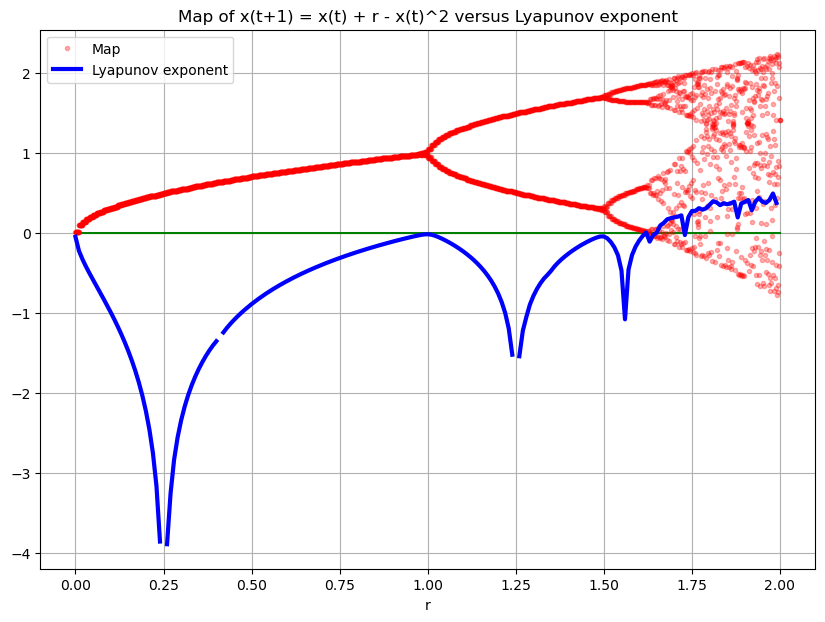

In [5]:
result = []
lambdas = []
maps = []

# [0,2) 间隔0.01
rvalues = np.arange(0, 2, 0.01)
# print(rvalues)
for r in rvalues:
    x = 0.1
    result = []
    # 每个r进行100轮迭代
    for t in range(100):
        x = x + r - x**2
        result.append(np.log(abs(1-2*x)))
    # res平均值
    lambdas.append(np.mean(result))
    # print("mean(result) == ",np.mean(result))
    for t in range(20):
        x = x + r - x**2
        maps.append(x)
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)
xticks = np.linspace(0,2,4000)
# print(len(lambdas)) # 200
# print(len(maps)) # 4000
# print(maps)
zero = [0]*4000
# 绿色横线
ax1.plot(xticks,zero,'g-')
# r. 表示红色点  b-表示蓝色线
ax1.plot(xticks,maps,'r.',alpha=0.3,label='Map')
ax1.set_xlabel('r')
ax1.plot(rvalues,lambdas,'b-',linewidth = 3,label = 'Lyapunov exponent')
ax1.set_xlabel('r')

ax1.grid('on')
ax1.legend(loc = 'best')
ax1.set_title('Map of x(t+1) = x(t) + r - x(t)^2 versus Lyapunov exponent')
plt.show()

C:\Users\oarrrr\AppData\Local\Temp\ipykernel_21920\3827925602.py:14: RuntimeWarning: divide by zero encountered in log
  result.append(np.log(abs(r-2*r*x)))


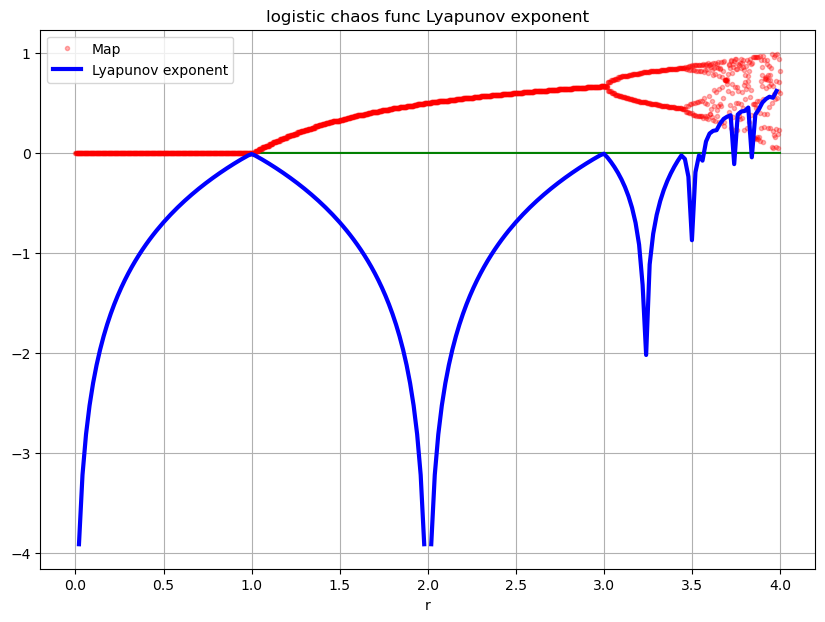

In [6]:
result = []
lambdas = []
maps = []
# u = 3.7
# [0,2) 间隔0.01
rvalues = np.arange(0, 4, 0.02)
# print(rvalues)
for r in rvalues:
    x = 0.5
    result = []
    # 每个r进行100轮迭代
    for t in range(1000):
        x = r * x * (1-x)
        result.append(np.log(abs(r-2*r*x)))
    # res平均值
    lambdas.append(np.mean(result))
    # print("mean(result) == ",np.mean(result))
    for t in range(10):
        x = r * x * (1-x)
        maps.append(x)
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)
xticks = np.linspace(0,4,2000)
# print(len(lambdas)) # 200
# print(len(maps)) # 4000
# print(maps)
zero = [0]*2000
# 绿色横线
ax1.plot(xticks,zero,'g-')
# r. 表示红色点  b-表示蓝色线
ax1.plot(xticks,maps,'r.',alpha=0.3,label='Map')
ax1.set_xlabel('r')
ax1.plot(rvalues,lambdas,'b-',linewidth = 3,label = 'Lyapunov exponent')
ax1.set_xlabel('r')

ax1.grid('on')
ax1.legend(loc = 'best')
ax1.set_title('logistic chaos func Lyapunov exponent')
plt.show()


eplison ==  0.0046700000000000005


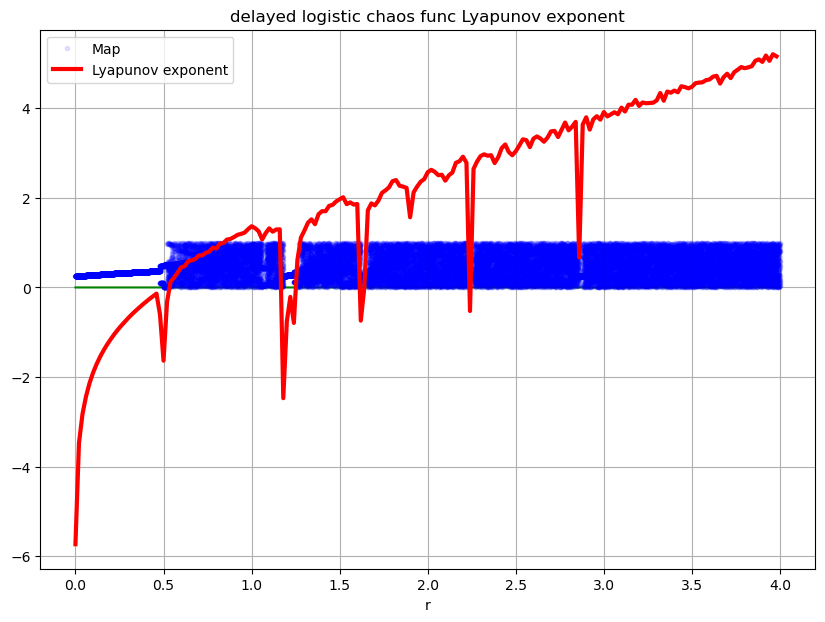

In [7]:
result = []
lambdas = []
maps = []
epsilon = 0.2 # [0,1]
theta = 3.9 # θ   wang2021使用 2.6 3.9计算
u1 = 3.95
theta_u1 = pow(theta,u1)
print()
epsilon_range = np.arange(0,1,0.00001)

# ======================
# 此处为通过u1 和 θ求eplison
for ep in epsilon_range:
    if ep == 0:
        continue
    # print(abs(i - (i * (1 - i) *  theta_u1) % 1))
    if abs(ep - (ep * (1 - ep) *  theta_u1) % 1) <= 0.0001:
        epsilon = ep
        break
print('eplison == ',epsilon)
# u = 3.7
# [0,2) 间隔0.01
uvalues = np.arange(0, 4, 0.02)
# print(uvalues)

theta_u = pow(theta,0)
theta_ep = pow(theta,epsilon)
lastx = 0
times = 0
for u in uvalues:
    x = 0.4
    x1 = x
    x2 = u*0.5
    theta_u = pow(theta,u)
    # print('theta_u == ',theta_u)
    df = x + theta_ep * lastx
    result = []

    for t in range(1000):
        df = x2 + theta_ep * x1
        x = np.mod(theta_u *df *(1 - df),1)
        x1 = x2
        x2 = x
        result.append(np.log(abs(theta_u*(1-2*df))))
        
    lambdas.append(np.mean(result))
    # print("mean(result) == ",np.mean(result))
    for t in range(200):
        df = x2 + theta_ep * x1
        x = np.mod(theta_u *df *(1 - df),1)
        x1 = x2
        x2 = x
        maps.append(x)


fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)
xticks = np.linspace(0,4,40000)
# print(len(lambdas)) # 200
# print(len(maps)) # 4000
# print(maps)
zero = [0]*40000
# 绿色横线
ax1.plot(xticks,zero,'g-')
# r. 表示红色点  b-表示蓝色线
ax1.plot(xticks,maps,'b.',alpha=0.1,label='Map')
ax1.set_xlabel('b')
ax1.plot(uvalues,lambdas,'r-',linewidth = 3,label = 'Lyapunov exponent')
ax1.set_xlabel('r')

ax1.grid('on')
ax1.legend(loc = 'best')
ax1.set_title('delayed logistic chaos func Lyapunov exponent')
plt.show()


u1 ==  -1


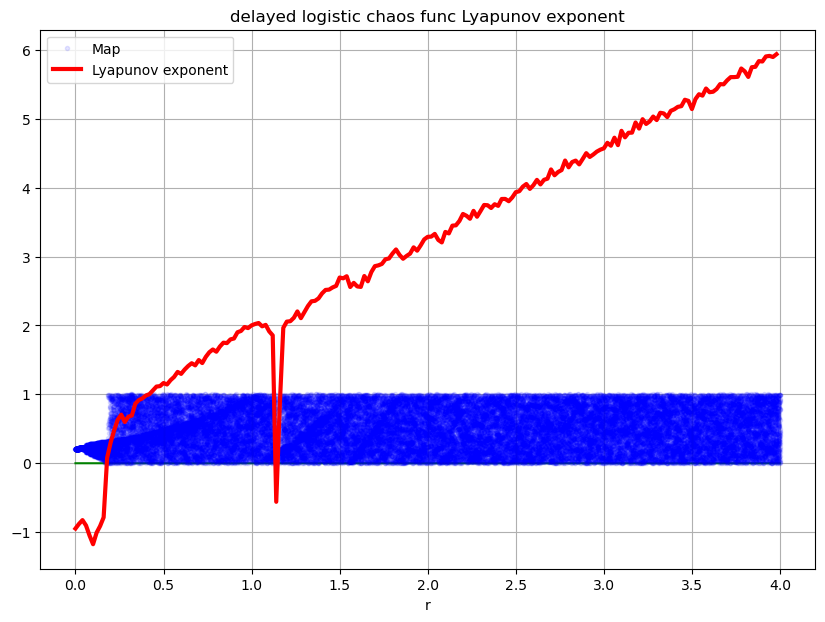

In [8]:
result = []
lambdas = []
maps = []
epsilon = 0.6 # [0,1]
theta = 3.9 # θ   wang2021使用 2.6 3.9计算
u1 = -1
print()

u1_range = np.arange(3.57,4,0.00001)
# ======================
# 此处为通过θ和eplison 求u1
for u in u1_range:
    if u == 3.57:
        continue
    theta_u1 = pow(theta,u)
    if abs(epsilon - (epsilon * (1 - epsilon) *  theta_u1) % 1) <= 0.00001:
        u1 = u
        break
print('u1 == ',u1)
# u = 3.7
# [0,2) 间隔0.01
uvalues = np.arange(0, 4, 0.02)
# print(uvalues)

theta_u = pow(theta,0)
theta_ep = pow(theta,epsilon)
lastx = 0
times = 0
for u in uvalues:
    x = 0.4
    x1 = x
    x2 = u*0.5
    theta_u = pow(theta,u)
    # print('theta_u == ',theta_u)
    df = x + theta_ep * lastx
    result = []

    for t in range(1000):
        df = x2 + theta_ep * x1
        x = np.mod(theta_u *df *(1 - df),1)
        x1 = x2
        x2 = x
        result.append(np.log(abs(theta_u*(1-2*df))))
        
    lambdas.append(np.mean(result))
    # print("mean(result) == ",np.mean(result))
    for t in range(200):
        df = x2 + theta_ep * x1
        x = np.mod(theta_u *df *(1 - df),1)
        x1 = x2
        x2 = x
        maps.append(x)


fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)
xticks = np.linspace(0,4,40000)
zero = [0]*40000
# 绿色横线
ax1.plot(xticks,zero,'g-')
# r. 表示红色点  b-表示蓝色线
ax1.plot(xticks,maps,'b.',alpha=0.1,label='Map')
ax1.set_xlabel('b')
ax1.plot(uvalues,lambdas,'r-',linewidth = 3,label = 'Lyapunov exponent')
ax1.set_xlabel('r')

ax1.grid('on')
ax1.legend(loc = 'best')
ax1.set_title('delayed logistic chaos func Lyapunov exponent')
plt.show()

# Tent map

40000


C:\Users\oarrrr\AppData\Local\Temp\ipykernel_21920\260594579.py:23: RuntimeWarning: divide by zero encountered in log
  result.append(np.log(abs(-u)))
C:\Users\oarrrr\AppData\Local\Temp\ipykernel_21920\260594579.py:20: RuntimeWarning: divide by zero encountered in log
  result.append(np.log(abs(u)))


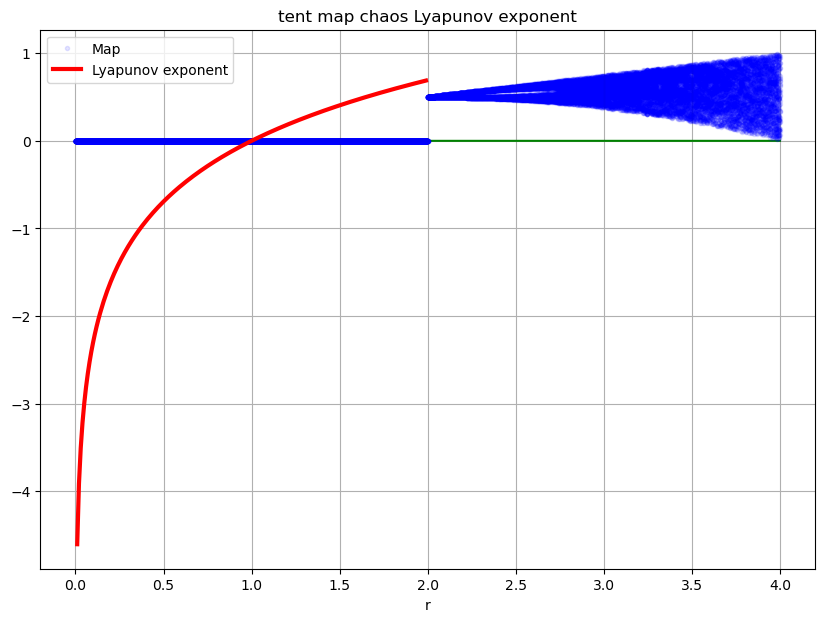

In [9]:

# Image Encryption Algorithm Based on Tent Delay-Sine Cascade with Logistic Map
result = []
lambdas = []
maps = []

uvalues = np.arange(0, 2, 0.01)
# print(uvalues)


for u in uvalues:
    # if u == 0:
    #     continue
    x = 0.5
    
    result = []

    for t in range(1000):
        if x < 0.5:
            x = u * x
            result.append(np.log(abs(u)))
        else:
            x = u * (1 - x)
            result.append(np.log(abs(-u)))
        
    lambdas.append(np.mean(result))
    # print("mean(result) == ",np.mean(result))
    for t in range(200):
        if x < 0.5:
            x = u * x
        else:
            x = u * (1 - x)
        maps.append(x)

print(len(maps))
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)
xticks = np.linspace(0,4,40000)
zero = [0]*40000

ax1.plot(xticks,zero,'g-')
ax1.plot(xticks,maps,'b.',alpha=0.1,label='Map')
ax1.set_xlabel('b')
ax1.plot(uvalues,lambdas,'r-',linewidth = 3,label = 'Lyapunov exponent')
ax1.set_xlabel('r')

ax1.grid('on')
ax1.legend(loc = 'best')
ax1.set_title('tent map chaos Lyapunov exponent')
plt.show()